# Imports de las librerias usadas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from apyori import apriori
import datetime

from sklearn.preprocessing import LabelEncoder

# Leer datasets

In [2]:
dataframe = pd.read_csv("dataset.csv")

dataframe['DateTime']= pd.to_datetime(dataframe['DateTime'])
dataframe.head()

,DateTime,Username,MacAddress,AccessPoint
0,2021-10-17 23:23:39,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
1,2021-10-17 23:23:39,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
2,2021-10-17 23:24:10,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
3,2021-10-17 23:24:10,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
4,2021-10-17 23:24:41,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2


### Cantidad de datos del dataset

In [3]:
dataframe.shape

(124510, 4)

## Visualización
Histograma de la cantidad de records con cada username encontrado en el dataset.

Username
CTI\ivaleriano                    AxesSubplot(0.125,0.125;0.775x0.755)
andres.wong                       AxesSubplot(0.125,0.125;0.775x0.755)
caril.martinez                    AxesSubplot(0.125,0.125;0.775x0.755)
cti\danny.torres                  AxesSubplot(0.125,0.125;0.775x0.755)
cti\victor.asanza                 AxesSubplot(0.125,0.125;0.775x0.755)
cti\xavier.aizaga                 AxesSubplot(0.125,0.125;0.775x0.755)
cti\yandrade                      AxesSubplot(0.125,0.125;0.775x0.755)
fernando.campana                  AxesSubplot(0.125,0.125;0.775x0.755)
gjimenez                          AxesSubplot(0.125,0.125;0.775x0.755)
gonzalo.mendez                    AxesSubplot(0.125,0.125;0.775x0.755)
humberto.guale                    AxesSubplot(0.125,0.125;0.775x0.755)
ivaleriano                        AxesSubplot(0.125,0.125;0.775x0.755)
juan.vera                         AxesSubplot(0.125,0.125;0.775x0.755)
judith.taranto                    AxesSubplot(0.125,0.125;0.775x0.75

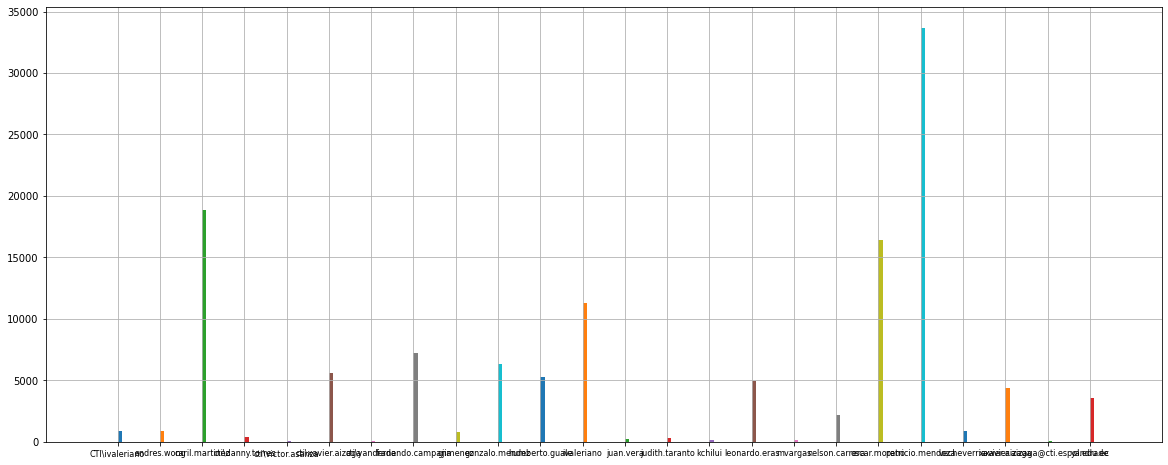

In [4]:
dataframe.groupby("Username")["Username"].hist(figsize=(20,8),xlabelsize=8)

Grafos de los usuarios con las Mac Address

In [10]:
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx

graph_dataframe = dataframe.drop(columns=['DateTime','AccessPoint'])
graph = nx.from_pandas_edgelist(graph_dataframe, source="Username", target="MacAddress")


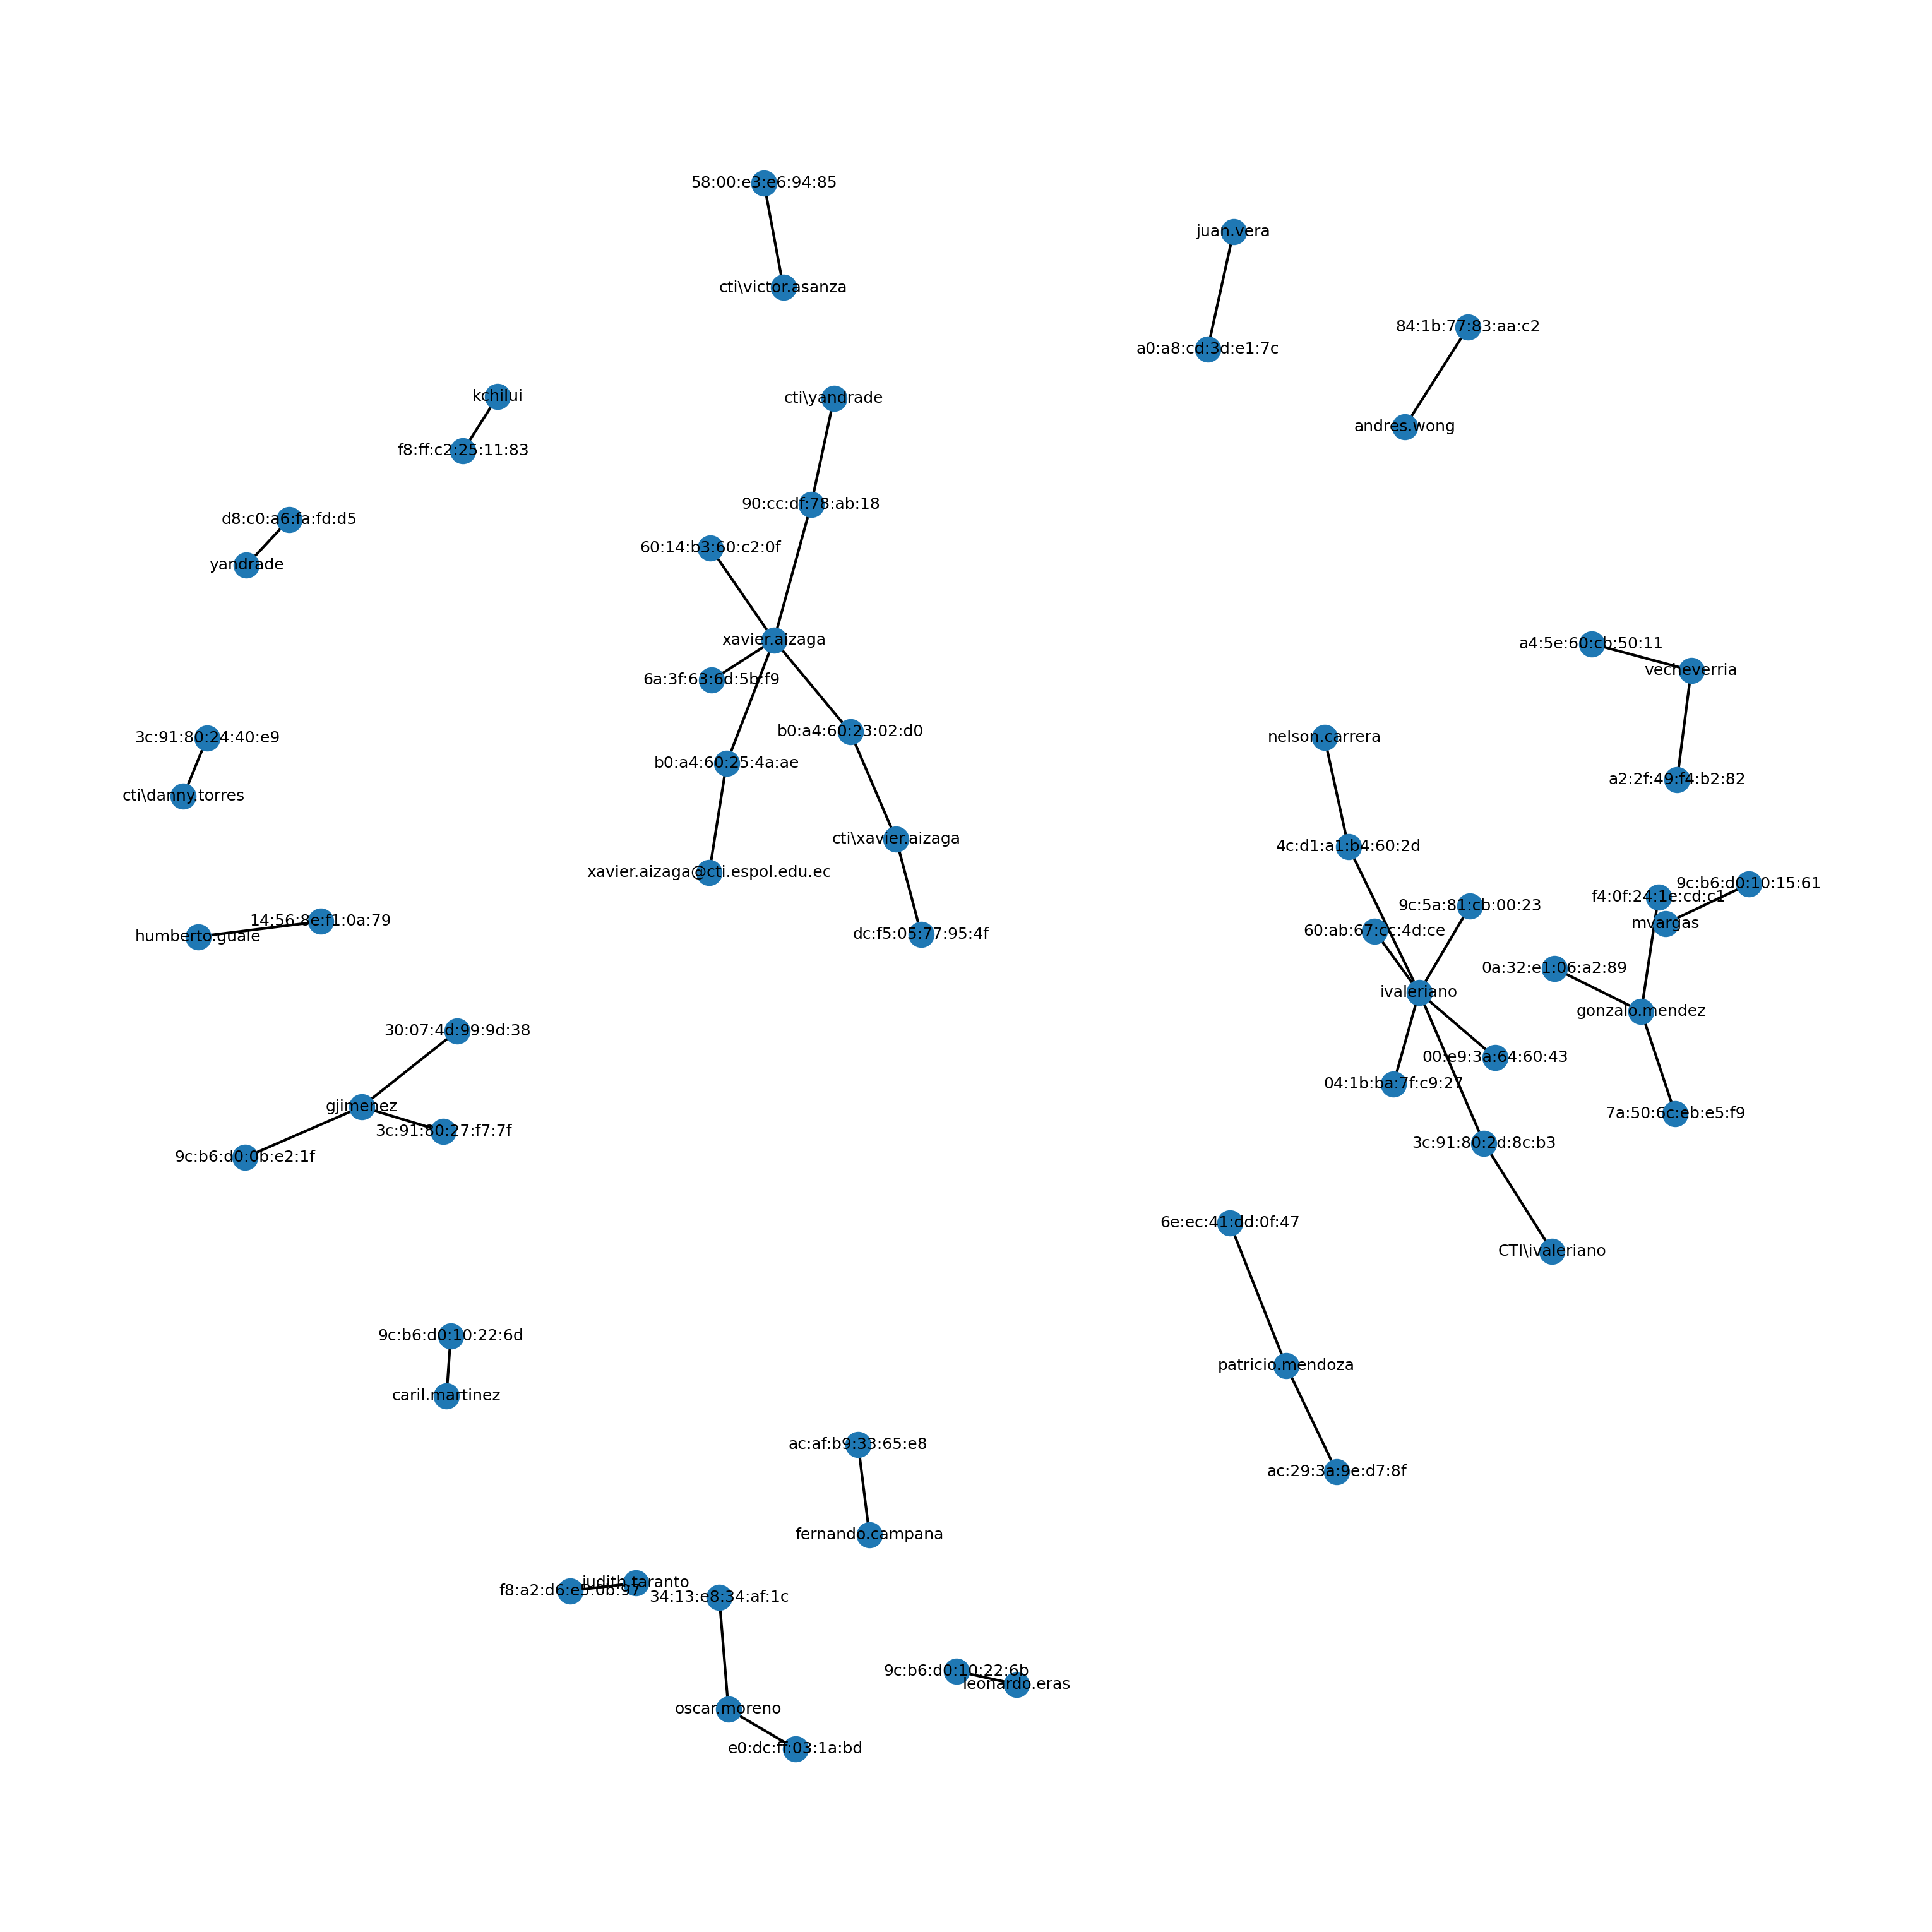

In [52]:
plt.figure(1,figsize=(10,10),dpi=300)
#nx.draw(graph,node_size=50,font_size=3,  with_labels=True,linewidths=0.25, pos=nx.spring_layout(graph))
nx.draw(graph,node_size=80,font_size=6,  with_labels=True, pos=nx.spring_layout(graph,k=0.15, iterations=30))


Grafo interactivo en html

In [53]:
net  = Network(notebook=True)
net.from_nx(graph)
net.show("graph.html")

# Algoritmo Apriori

## Creación de records para creación de modelo
Para poder entrenar el modelo y obtener resultados debemos crear conjuntos de elementos que tendran esta asociacion implicita. Como nosotros queremos encontrar asociación entre la Mac Address y el Username de los clientes, dejamos estas dos columnas para su análisis. En caso de querer encontrar mas asociaciones podriamos dejar mas información como el AP al que esta conectado.

In [6]:
df = dataframe.groupby([dataframe['DateTime'].dt.date]).mean()["DateTime"]
print(df)

DateTime
2021-10-17   2021-10-17 23:41:36.028168960
2021-10-18   2021-10-18 08:32:25.843478272
2021-10-19   2021-10-19 18:12:25.218434304
2021-10-20   2021-10-20 09:40:48.550530816
2021-10-21   2021-10-21 09:45:14.959881472
2021-10-22   2021-10-22 09:33:19.974117120
2021-10-23   2021-10-23 00:41:08.888888832
2021-10-24   2021-10-24 23:03:26.276190464
2021-10-25   2021-10-25 04:56:22.501264640
2021-10-26   2021-10-26 14:59:13.760431360
2021-10-27   2021-10-27 12:46:34.558976000
2021-10-28   2021-10-28 10:34:32.750263296
2021-10-29   2021-10-29 09:29:04.681672192
2021-11-03   2021-11-03 18:49:27.449137920
2021-11-04   2021-11-04 10:18:05.795346176
2021-11-05   2021-11-05 18:05:55.920935424
2021-11-06   2021-11-06 07:42:03.287823104
2021-11-07   2021-11-07 08:44:56.390890752
2021-11-08   2021-11-08 11:13:30.297093888
2021-11-09   2021-11-09 10:54:09.718451200
2021-11-11   2021-11-11 10:20:45.997792512
2021-11-15   2021-11-15 18:54:16.192916736
2021-11-16   2021-11-16 09:21:05.145576192
20

C:\Users\JTPC\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("20/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section1 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section1

,DateTime,Username,Mac Address,Access_Point
142,2021-10-18 00:00:03,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
143,2021-10-18 00:00:03,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
144,2021-10-18 00:00:34,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
145,2021-10-18 00:00:34,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
146,2021-10-18 00:01:05,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
...,...,...,...,...
113719,2021-10-19 20:17:32,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center
113720,2021-10-19 20:18:39,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center
113721,2021-10-19 20:19:12,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center
113722,2021-10-19 20:19:46,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center


In [8]:
date_start = datetime.datetime.strptime("18/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("22/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section2 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section2

,DateTime,Username,Mac Address,Access_Point
142,2021-10-18 00:00:03,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
143,2021-10-18 00:00:03,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
144,2021-10-18 00:00:34,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
145,2021-10-18 00:00:34,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
146,2021-10-18 00:01:05,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
...,...,...,...,...
114780,2021-10-21 15:31:24,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center
114781,2021-10-21 15:31:24,cti\xavier.aizaga,b0:a4:60:23:02:d0,Data_Center
114782,2021-10-21 15:40:30,nelson.carrera,4c:d1:a1:b4:60:2d,Lobby
114783,2021-10-21 16:30:33,xavier.aizaga,6a:3f:63:6d:5b:f9,Lobby


Total Records

In [55]:
df_records_total = dataframe.drop(columns=['DateTime','AccessPoint'])

records_total = df_records_total.to_records(index=False)

print(list(records_total)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:

Section Records

In [10]:
df_records_section1 = df_section1.drop(columns=['DateTime','AccessPoint'])

record_section1 = df_records_section1.to_records(index=False)

print(list(record_section1)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:

In [11]:

df_records_section2 = df_section2.drop(columns=['DateTime','AccessPoint'])

record_section2 = df_records_section2.to_records(index=False)

print(list(record_section1)[:30])

[('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:65:e8'), ('caril.martinez', '9c:b6:d0:10:22:6d'), ('fernando.campana', 'ac:af:b9:33:

## Ejecución del algoritmo
A partir de la información organizada ingresamos el algoritmo que ira aprendiendo y generando reglas de asociación para las instancias que encuentra. Luego recorremos estas reglas y las mostramos por consola.

In [56]:
#Funcion para imprimir las reglas
def printRules(lista):
    for item in lista:
        pair = item[0]
        items = [x for x in pair]
        print("Rule: "+ items[0] + " -> "+items[1])
        print("Support: "+ str(item[1])) #Individual popularity (ItemA/TotalTransactions)
        print("Confidence: "+str(item[2][0][2])) #Item A Will include more profit for item B (Item (A+B)/Item (A))
        print("Lift: " + str(item[2][0][3])) #How much Item A includes profit in item B (Confidence/Support)
        print("========================================")

#Funcion para crear un dataset de reglas
def dataframeRules(lista):
    dataset = []
    for item in lista:
        pair = item[0]
        items = [x for x in pair]
        if(":" in items[0] ):
            dataset.append([items[0],items[1],item[1],item[2][0][2],item[2][0][3]])
        else:
            dataset.append([items[1],items[0],item[1],item[2][0][2],item[2][0][3]])
    return pd.DataFrame(dataset,columns=["A","B","Support","Confidence","Lift"])

Ejecución de algoritmo en el dataset completo:

In [64]:
association_rules_total = apriori(records_total, min_support=0.0010,min_confidence=0.2,min_lift=2,min_length=2)
association_results_total = list(association_rules_total)
dataframe_rules_total = dataframeRules(association_results_total)
dataframe_rules_total
#print(association_results_total[0])
#printRules(association_results_total)

,A,B,Support,Confidence,Lift
0,04:1b:ba:7f:c9:27,ivaleriano,0.016641,1.000000,11.027367
1,0a:32:e1:06:a2:89,gonzalo.mendez,0.015083,1.000000,19.704067
2,14:56:8e:f1:0a:79,humberto.guale,0.042045,1.000000,23.784145
3,30:07:4d:99:9d:38,gjimenez,0.004698,1.000000,158.409669
4,34:13:e8:34:af:1c,oscar.moreno,0.116055,1.000000,7.585598
5,3c:91:80:24:40:e9,cti\danny.torres,0.003132,1.000000,319.256410
6,3c:91:80:27:f7:7f,gjimenez,0.001582,1.000000,158.409669
7,3c:91:80:2d:8c:b3,CTI\ivaleriano,0.006835,0.307776,45.030741
8,3c:91:80:2d:8c:b3,ivaleriano,0.015372,0.692224,7.633411
9,4c:d1:a1:b4:60:2d,nelson.carrera,0.017220,0.871899,50.634404


Grafo de las reglas de asociación creadas

In [65]:
from pyvis.network import Network
import matplotlib.pyplot as plt
import networkx as nx

graph_ar_dataframe = dataframe_rules_total.drop(columns=['Support','Confidence','Lift'])
graph_ar = nx.from_pandas_edgelist(graph_ar_dataframe, source="A", target="B")
net  = Network(notebook=True)
net.from_nx(graph_ar)
net.show("graph_association_rules.html")

Algoritmo en seccion 1:

In [14]:
association_rules_section1 = apriori(record_section1, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section1 = list(association_rules_section1)
dataframe_rules_section1 = dataframeRules(association_results_section1)
dataframe_rules_section1
#printRules(association_results_section1)
#dataframe_rules_section1 = dataframeRules(association_results_section1).set_index("A")
#dataframe_rules_section1

,A,B,Support,Confidence,Lift
0,3c:91:80:2d:8c:b3,CTI\ivaleriano,0.047634,1.0,20.993569
1,4c:d1:a1:b4:60:2d,ivaleriano,0.023587,1.0,10.106811
2,6a:3f:63:6d:5b:f9,xavier.aizaga,0.005973,1.0,167.410256
3,84:1b:77:83:aa:c2,andres.wong,0.094961,1.0,10.530645
4,9c:5a:81:cb:00:23,ivaleriano,0.075356,1.0,10.106811
5,9c:b6:d0:10:22:6d,caril.martinez,0.274315,1.0,3.645449
6,ac:29:3a:9e:d7:8f,patricio.mendoza,0.114719,1.0,8.716956
7,ac:af:b9:33:65:e8,fernando.campana,0.274315,1.0,3.645449
8,e0:dc:ff:03:1a:bd,oscar.moreno,0.080717,1.0,12.388994


Algoritmo en sección 2:
Incrementado, sección anterior y nueva.

In [15]:
association_rules_section2 = apriori(record_section1, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section2 = list(association_rules_section2)
dataframe_rules_section2 = dataframeRules(association_results_section2)
dataframe_rules_section2
#printRules(association_results_section1)

,A,B,Support,Confidence,Lift
0,3c:91:80:2d:8c:b3,CTI\ivaleriano,0.047634,1.0,20.993569
1,4c:d1:a1:b4:60:2d,ivaleriano,0.023587,1.0,10.106811
2,6a:3f:63:6d:5b:f9,xavier.aizaga,0.005973,1.0,167.410256
3,84:1b:77:83:aa:c2,andres.wong,0.094961,1.0,10.530645
4,9c:5a:81:cb:00:23,ivaleriano,0.075356,1.0,10.106811
5,9c:b6:d0:10:22:6d,caril.martinez,0.274315,1.0,3.645449
6,ac:29:3a:9e:d7:8f,patricio.mendoza,0.114719,1.0,8.716956
7,ac:af:b9:33:65:e8,fernando.campana,0.274315,1.0,3.645449
8,e0:dc:ff:03:1a:bd,oscar.moreno,0.080717,1.0,12.388994


## Actualización de información

Función:

In [16]:
def updateRules(lastRules, newRules):
    total_indexes = lastRules.index
    updated_dataframe_rules = lastRules
    for mac in newRules.index:
        if mac not in total_indexes:
            updated_dataframe_rules = updated_dataframe_rules.append(newRules.loc[mac])
        elif lastRules.loc[mac]["B"] != newRules.loc[mac]["B"]:
            updated_dataframe_rules = updated_dataframe_rules.drop(mac)
            updated_dataframe_rules = updated_dataframe_rules.append(newRules.loc[mac])
    return updated_dataframe_rules

Uso de la función y almacenamiento en archivo csv.

In [17]:
new_association_rules =  updateRules(dataframe_rules_section1,dataframe_rules_section2)
new_association_rules
#new_association_rules.to_csv("association_rules.csv")


,A,B,Support,Confidence,Lift
0,3c:91:80:2d:8c:b3,CTI\ivaleriano,0.047634,1.0,20.993569
1,4c:d1:a1:b4:60:2d,ivaleriano,0.023587,1.0,10.106811
2,6a:3f:63:6d:5b:f9,xavier.aizaga,0.005973,1.0,167.410256
3,84:1b:77:83:aa:c2,andres.wong,0.094961,1.0,10.530645
4,9c:5a:81:cb:00:23,ivaleriano,0.075356,1.0,10.106811
5,9c:b6:d0:10:22:6d,caril.martinez,0.274315,1.0,3.645449
6,ac:29:3a:9e:d7:8f,patricio.mendoza,0.114719,1.0,8.716956
7,ac:af:b9:33:65:e8,fernando.campana,0.274315,1.0,3.645449
8,e0:dc:ff:03:1a:bd,oscar.moreno,0.080717,1.0,12.388994


In [18]:
updateRules(dataframe_rules_section1,dataframe_rules_section2)

,A,B,Support,Confidence,Lift
0,3c:91:80:2d:8c:b3,CTI\ivaleriano,0.047634,1.0,20.993569
1,4c:d1:a1:b4:60:2d,ivaleriano,0.023587,1.0,10.106811
2,6a:3f:63:6d:5b:f9,xavier.aizaga,0.005973,1.0,167.410256
3,84:1b:77:83:aa:c2,andres.wong,0.094961,1.0,10.530645
4,9c:5a:81:cb:00:23,ivaleriano,0.075356,1.0,10.106811
5,9c:b6:d0:10:22:6d,caril.martinez,0.274315,1.0,3.645449
6,ac:29:3a:9e:d7:8f,patricio.mendoza,0.114719,1.0,8.716956
7,ac:af:b9:33:65:e8,fernando.campana,0.274315,1.0,3.645449
8,e0:dc:ff:03:1a:bd,oscar.moreno,0.080717,1.0,12.388994


Prueba de efectividad

In [19]:
date_start = datetime.datetime.strptime("22/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("8/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section3 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section3

,DateTime,Username,Mac Address,Access_Point
17405,2021-10-22 00:02:23,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
17406,2021-10-22 00:02:23,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
17407,2021-10-22 00:02:23,fernando.campana,ac:af:b9:33:65:e8,Domo_Teleco1
17408,2021-10-22 00:06:53,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
17409,2021-10-22 00:06:53,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
...,...,...,...,...
124505,2021-12-07 13:20:54,humberto.guale,14:56:8e:f1:0a:79,TEA_TAI
124506,2021-12-07 14:23:53,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center
124507,2021-12-07 14:24:24,xavier.aizaga,6a:3f:63:6d:5b:f9,Lobby
124508,2021-12-07 14:24:56,xavier.aizaga,6a:3f:63:6d:5b:f9,Lobby


Tomamos las reglas generadas con las secciones 1,2 (18 al 22 de octubre del 2021) y realizamos pruebas con la sección 3 (22 de octubre al 8 de diciembre) para obtener el porcentaje de asociaciones correcta que realiza. (La seccion 1 y 2 es muy pequeña a comparación de la seccion 3).

In [43]:
igual = 0
total = 0
for row in df_section3.values:    
    username_dataset = row[1]
    username_rule = dataframe_rules_section2.loc[dataframe_rules_section2['A'] == row[2]]["B"]
    if( username_rule.size != 0):
        if(username_dataset == username_rule.iloc[0]):
            igual+=1
    total += 1

print("Valor total de registros: "+ str(total))
print("Valor total de asociados correctamente: "+ str(igual))
print("Porcentaje de asociados correctamente: "+ str(igual*100/total))
    

Valor total de registros: 104949
Valor total de asociados correctamente: 57782
Porcentaje de asociados correctamente: 55.05721826792061


Ahora realizamos la misma prueba con el dataset, usamos las reglas generadas con todo el dataset y sacamos el porcentajes de asociaciones correctas.

In [44]:
igual = 0
total = 0
for row in df_section3.values:    
    username_dataset = row[1]
    username_rule = dataframe_rules_total.loc[dataframe_rules_total['A'] == row[2]]["B"]
    if( username_rule.size != 0):
        if(username_dataset == username_rule.iloc[0]):
            igual+=1
    total += 1

print("Valor total de registros: "+ str(total))
print("Valor total de asociados correctamente: "+ str(igual))
print("Porcentaje de asociados correctamente: "+ str(igual*100/total))

Valor total de registros: 104949
Valor total de asociados correctamente: 101256
Porcentaje de asociados correctamente: 96.48114798616471


Creamos dos nuevas secciones donde la una sea mas representativa que la otra.

Seccion 5 del 17 de octubre al 4 de diciembre del 2021: 

In [53]:
date_start = datetime.datetime.strptime("17/10/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("4/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section5 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section5

df_records_section5 = df_section5.drop(columns=['DateTime','AccessPoint'])
record_section5 = df_records_section5.to_records(index=False)

print(df_section5.shape)

association_rules_section5 = apriori(record_section5, min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)
association_results_section5 = list(association_rules_section5)
dataframe_rules_section5 = dataframeRules(association_results_section5)
dataframe_rules_section5


(100728, 4)


,A,B,Support,Confidence,Lift
0,04:1b:ba:7f:c9:27,ivaleriano,0.020570,1.000000,11.274681
1,0a:32:e1:06:a2:89,gonzalo.mendez,0.018644,1.000000,15.940497
2,14:56:8e:f1:0a:79,humberto.guale,0.044824,1.000000,22.309635
3,30:07:4d:99:9d:38,gjimenez,0.005808,1.000000,128.808184
4,34:13:e8:34:af:1c,oscar.moreno,0.083959,1.000000,9.665867
5,3c:91:80:2d:8c:b3,CTI\ivaleriano,0.008448,0.324809,38.445802
6,3c:91:80:2d:8c:b3,ivaleriano,0.017562,0.675191,7.612561
7,4c:d1:a1:b4:60:2d,nelson.carrera,0.021285,0.871899,40.962993
8,6a:3f:63:6d:5b:f9,xavier.aizaga,0.026487,1.000000,31.835651
9,6e:ec:41:dd:0f:47,patricio.mendoza,0.007803,1.000000,3.636259


Sección 6 del 4 de diciembre al 8 de diciembre del 2021

In [54]:
date_start = datetime.datetime.strptime("4/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')
date_end = datetime.datetime.strptime("8/12/2021 00:00:00", '%d/%m/%Y %H:%M:%S')

df_section6 = dataframe[(dataframe['DateTime'] > date_start) & (dataframe['DateTime'] < date_end)]
df_section6

,DateTime,Username,Mac Address,Access_Point
90802,2021-12-04 00:00:27,oscar.moreno,34:13:e8:34:af:1c,Domo_Teleco2
90803,2021-12-04 00:00:27,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
90804,2021-12-04 00:00:27,patricio.mendoza,ac:29:3a:9e:d7:8f,Domo_Teleco2
90805,2021-12-04 00:00:59,oscar.moreno,34:13:e8:34:af:1c,Domo_Teleco2
90806,2021-12-04 00:00:59,caril.martinez,9c:b6:d0:10:22:6d,Domo_Teleco2
...,...,...,...,...
124505,2021-12-07 13:20:54,humberto.guale,14:56:8e:f1:0a:79,TEA_TAI
124506,2021-12-07 14:23:53,xavier.aizaga,6a:3f:63:6d:5b:f9,Data_Center
124507,2021-12-07 14:24:24,xavier.aizaga,6a:3f:63:6d:5b:f9,Lobby
124508,2021-12-07 14:24:56,xavier.aizaga,6a:3f:63:6d:5b:f9,Lobby


Nuevamente sacamos los valores de porcentaje

In [55]:
igual = 0
total = 0
for row in df_section6.values:    
    username_dataset = row[1]
    username_rule = dataframe_rules_section5.loc[dataframe_rules_section5['A'] == row[2]]["B"]
    if( username_rule.size != 0):
        if(username_dataset == username_rule.iloc[0]):
            igual+=1
    total += 1

print("Valor total de registros: "+ str(total))
print("Valor total de asociados correctamente: "+ str(igual))
print("Porcentaje de asociados correctamente: "+ str(igual*100/total))

Valor total de registros: 23782
Valor total de asociados correctamente: 23536
Porcentaje de asociados correctamente: 98.96560423849971
